**Can we predict the average exam score for a student through standardized or reduced lunches?**

In [28]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)

**Note:** Reduced lunches are nutritionally balanced, low-cost, or free lunches given to students in the United States with a family income that is below 185 percent of the Federal poverty line. (www.ers.usda.gov)

In [29]:
#demonstrate the dataset can be read from the web into R
grades <-read_csv("StudentsPerformance.csv")

set.seed(1)
colnames(grades) <- make.names(colnames(grades))

Parsed with column specification:
cols(
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)



In [35]:
#changing Lunch to as factor <fct>
fct_lunch = grades %>% 
    mutate(lunch = as_factor(lunch))
glimpse(fct_lunch)

#returning each categroy in the column
stu_pull = fct_lunch %>%
    pull(lunch) %>%
    levels()
stu_pull

#creates a chart that shows the variables with counts and percentages 
grades_obs = nrow(grades)
    grades %>%
    group_by(lunch) %>% 
    summarize(
        count = n(),
        percentage = n() / grades_obs * 100 )

Rows: 1,000
Columns: 8
$ gender                      <chr> "female", "female", "female", "male", "ma…
$ race.ethnicity              <chr> "group B", "group C", "group B", "group A…
$ parental.level.of.education <chr> "bachelor's degree", "some college", "mas…
$ lunch                       <fct> standard, standard, standard, free/reduce…
$ test.preparation.course     <chr> "none", "completed", "none", "none", "non…
$ math.score                  <dbl> 72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 5…
$ reading.score               <dbl> 72, 90, 95, 57, 78, 83, 95, 43, 64, 60, 5…
$ writing.score               <dbl> 74, 88, 93, 44, 75, 78, 92, 39, 67, 50, 5…


[1] "standard"     "free/reduced"

`summarise()` ungrouping output (override with `.groups` argument)



lunch,count,percentage
<chr>,<int>,<dbl>
free/reduced,355,35.5
standard,645,64.5


**Summary of the data:** We have 1,000 rows in this data set, and we are focusing on if we are able to make an accurate prediction on student grades based on their _test preparation_, _parental level of education_, the _average score based on math_, _reading_, and _writing_, with _lunch being the factor_. There are two categories that the students may be under, _standardized lunches_ or _free/reduced lunches_. The table above displays the lunch distribution with percentage, and shows that more students have standardized lunches. This will be accounted for in the prediction analysis below (centering and standardizng).

`summarise()` ungrouping output (override with `.groups` argument)



letter_grade,number_obs_per_class
<fct>,<int>
fail,36
D,67
C,127
B,140
A,116


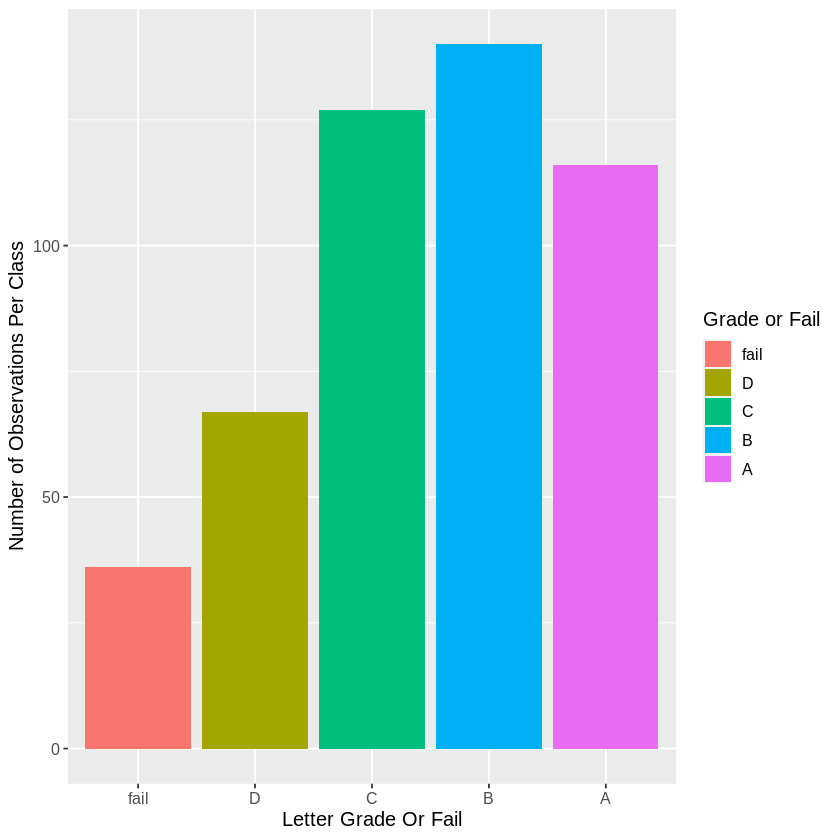

In [37]:
#splitting the data into 75% training
grades_split<- initial_split(grades_new_standard, prop=0.75, strata = letter_grade)
grades_train <- training(grades_split)
grades_test <- testing(grades_split)

#for standard lunches
grades_selected_standard_lunch <- grades %>%
    select (lunch, test.preparation.course, parental.level.of.education, math.score, reading.score, writing.score) %>%
    filter (lunch == "standard")

#adding average grades for standard lunch
grades_new_standard <- grades_selected_standard_lunch %>%
    mutate (average.score = (math.score + reading.score + writing.score)/3) %>%
    mutate(letter_grade =cut(average.score, breaks = c(0,50,60,70,80,100), labels =c("fail", "D", "C", "B", "A")))%>%
    mutate (letter_grade = as_factor(letter_grade))

#using only training data summarize the data into one table 

grades_train_table <- grades_train %>%
        select(letter_grade)%>%
        group_by (letter_grade) %>%
        summarize (number_obs_per_class = n())

grades_train_table

#visualizing training data
grades_bar <- ggplot(grades_train_table, 
                      aes(x = letter_grade,
                          y = number_obs_per_class,
                         fill = letter_grade)) +
  geom_bar(stat = "identity") +
  labs(x = "Letter Grade Or Fail", y = "Number of Observations Per Class", fill = "Grade or Fail") +
  theme(text = element_text(size =12))

grades_bar